# 1. Environment Setup

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]
mRNA_peak_150_file = doc["mRNA_peak_150_file"]
supplemental = doc["supplemental"]
tss_annotation = doc['tss_annotation']

import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
import time

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
from create_output import *
print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


In [3]:
sys.path.append("/home/isshamie/software/homebrew/parallel_functions/")
import parallel_functions as pf

In [4]:
import motif_analysis

## Create directory

In [5]:
out_dir = "Results/Figures/SuppFigure3/"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In [6]:
fasta_dir = "Results/Figures/SuppFigure3/fasta_files"
if not os.path.exists(fasta_dir):
    os.mkdir(fasta_dir)

## Motif Generation

### Using FIMO

# 1. 

## First do the TSSs used in the final output

### Experimental

In [7]:
## Get the sequence for the file
peak_f = "Results/output/TSS1.exp.bed"
seq_f = "Results/Figures/SuppFigure3/fasta_files/TSS1.exp.fa".format(sample=os.path.basename(peak_f))
cmd = "homerTools extract {peak_f} {ref_fa} -fa > {seq_f}".format(peak_f=peak_f,seq_f=seq_f,ref_fa=ref_fa)
!{cmd}
print(cmd)

homerTools extract Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -fa > Results/Figures/SuppFigure3/fasta_files/TSS1.exp.fa


In [7]:
t = time.time()
seq_f = "Results/Figures/SuppFigure3/TSS1.exp.fa"
meme_motifs_dir = '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/MEME_motifs.txt'
out_dir = "Results/Figures/SuppFigure3/TSS1.exp_meme"
cmd = "fimo --o {out_dir} {motif_f} {seq_f} ".format(motif_f=meme_motifs_dir,seq_f=seq_f,out_dir=out_dir)
print(cmd)
!{cmd}
print(t - time.time())


fimo --o Results/Figures/SuppFigure3/TSS1.exp_meme /data/isshamie/TSS/Analysis/supplemental/homer_motifs/MEME_motifs.txt Results/Figures/SuppFigure3/TSS1.exp.fa 
Using motif +ap1.motif of width 10.
Using motif -ap1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +ap2.motif of width 12.
Using motif -ap2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.724037
Using motif +ap2gamma.motif of width 12.
Using motif -ap2gamma.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.710693
Using motif +ap4.motif of width 10.
Using motif -ap4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.913621
Using motif +ar-half.motif of width 10.
Using m

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.887037
Using motif +cre.motif of width 12.
Using motif -cre.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.739216
Using motif +crx.motif of width 8.
Using motif -crx.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +ctcf-mys.motif of width 20.
Using motif -ctcf-mys.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.979773
Using motif +ctcf.motif of width 20.
Using motif -ctcf.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.786038
Using motif +cux2.motif of width 10.
Using motif -cux2.motif of width 10.
Computing 

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.867965
Using motif +ets1.motif of width 10.
Using motif -ets1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.948923
Using motif +etv1.motif of width 10.
Using motif -etv1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.913704
Using motif +etv2.motif of width 12.
Using motif -etv2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.944179
Using motif +etv4.motif of width 10.
Using motif -etv4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.8292
Using motif +ews-erg.motif of width 10.
Using motif -ews-erg.motif of width 10.
C

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +gre.motif of width 16.
Using motif -gre.motif of width 16.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.961699
Using motif +grhl2.motif of width 20.
Using motif -grhl2.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +gsc.motif of width 8.
Using motif -gsc.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +hand2.motif of width 15.
Using motif -hand2.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.950563
Using motif +heb.motif of width 10.
Using motif -heb.motif of width 10.
Computing q-values.
Estimating

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.791532
Using motif +klf3.motif of width 15.
Using motif -klf3.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.778667
Using motif +klf4.motif of width 10.
Using motif -klf4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.808713
Using motif +klf5.motif of width 10.
Using motif -klf5.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.826964
Using motif +klf6.motif of width 12.
Using motif -klf6.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.771852
Using motif +klf9.motif of width 12.
Using motif -klf9.motif of width 12.
Compu

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfil3.motif of width 15.
Using motif -nfil3.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfkb.motif of width 10.
Using motif -nfkb.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.999497
Using motif +nfy.motif of width 10.
Using motif -nfy.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.887921
Using motif +nkx2.1.motif of width 10.
Using motif -nkx2.1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.999095
Using motif +nkx2.2.motif of width 10.
Using motif -nkx2.2.motif of width 10.
Computing q

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.7628
Using motif +pbx1.motif of width 12.
Using motif -pbx1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.9
Using motif +pbx2.motif of width 12.
Using motif -pbx2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pbx3.motif of width 12.
Using motif -pbx3.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.970435
Using motif +pdx1.motif of width 10.
Using motif -pdx1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pgr.motif of width 15.
Using motif -pgr.motif of width 15.
Computing q-values.
Estimati

Estimated pi_0=0.956766
Using motif +scrt1.motif of width 10.
Using motif -scrt1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.963117
Using motif +sf1.motif of width 10.
Using motif -sf1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.937
Using motif +six1.motif of width 12.
Using motif -six1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +six2.motif of width 12.
Using motif -six2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +six4.motif of width 15.
Using motif -six4.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.901805
Using motif +tcf3.motif of width 10.
Using motif -tcf3.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf4.motif of width 12.
Using motif -tcf4.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf7.motif of width 12.
Using motif -tcf7.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf7l2.motif of width 10.
Using motif -tcf7l2.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcfcp2l1.motif of width 20.
Using motif -tcfcp2l1.motif of width 20.
Computing q-values.
E

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.98573
Using motif +znf322.motif of width 20.
Using motif -znf322.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.870563
Using motif +znf382.motif of width 20.
Using motif -znf382.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.997688
Using motif +znf41.motif of width 25.
Using motif -znf41.motif of width 25.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.960115
Using motif +znf415.motif of width 12.
Using motif -znf415.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.858393
Using motif +znf416.motif of width 10.
Using motif -znf416.motif o

### Refseq

In [9]:
## Create RefSeq peak and sequence files
peak_f = "Results/output/TSS1.exp.bed"
meta_f = "Results/output/TSS1.exp.meta"
save_f = "Results/Figures/SuppFigure3/fasta_files/TSS1.mrna"
exp_bed_to_refseq(peak_f,meta_f,refseq_f=mRNA_peak_file,save_f=save_f,is_unique=True)
seq_f = "Results/Figures/SuppFigure3/fasta_files/TSS1.mrna.fa"
cmd = "homerTools extract {peak_f} {ref_fa} -fa > {seq_f}".format(peak_f=peak_f,seq_f=seq_f,ref_fa=ref_fa)
!{cmd}
print(cmd)


	Extracting sequences from file: /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna
	Looking for peak sequences in a single file (/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna)
	Extracting 86 sequences from NW_020822366.1
	Extracting 462 sequences from NW_020822370.1
	Extracting 82 sequences from NW_020822372.1
	Extracting 82 sequences from NW_020822373.1
	Extracting 42 sequences from NW_020822374.1
	Extracting 363 sequences from NW_020822375.1
	Extracting 76 sequences from NW_020822376.1
	Extracting 69 sequences from NW_020822377.1
	Extracting 56 sequences from NW_020822379.1
	Extracting 239 sequences from NW_020822381.1
	Extracting 32 sequences from NW_020822382.1
	Extracting 15 sequences from NW_020822385.1
	Extracting 98 sequences from NW_020822388.1
	Extracting 20 sequences from NW_020822390.1
	Extracting 7 sequences from NW_020822391.1
	Extracting 89 sequences from NW_020822393.1
	Extracting 20 sequences from NW_020822394.1


	Extracting 41 sequences from NW_020822666.1
	Extracting 33 sequences from NW_020822668.1
	Extracting 23 sequences from NW_020822670.1
	Extracting 28 sequences from NW_020822671.1
	Extracting 37 sequences from NW_020822672.1
	Extracting 24 sequences from NW_020822674.1
	Extracting 41 sequences from NW_020822676.1
	Extracting 59 sequences from NW_020822680.1
	Extracting 20 sequences from NW_020822681.1
	Extracting 9 sequences from NW_020822686.1
	Extracting 113 sequences from NW_020822687.1
	Extracting 138 sequences from NW_020822688.1
	Extracting 1 sequences from NW_020822690.1
	Extracting 145 sequences from NW_020822698.1
	Extracting 57 sequences from NW_020822699.1
	Extracting 63 sequences from NW_020822701.1
	Extracting 1 sequences from NW_020822702.1
	Extracting 53 sequences from NW_020822703.1
	Extracting 1 sequences from NW_020822734.1
	Extracting 1 sequences from NW_020822867.1
	Extracting 1 sequences from NW_020822982.1
	Extracting 3 sequences from NW_020823085.1
	Extracting 1 

In [ ]:
t = time.time()
seq_f = os.path.join("Results/Figures/SuppFigure3/TSS1.exp_refseq_centered.fa")
meme_motifs_dir = '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/MEME_motifs.txt'
out_dir = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme"
#f_save = 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_meme'
cmd = "fimo --o {out_dir} {motif_f} {seq_f} ".format(motif_f=meme_motifs_dir,seq_f=seq_f,out_dir=out_dir)
print(cmd)
!{cmd}
print(time.time()-t)

fimo --o Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme /data/isshamie/TSS/Analysis/supplemental/homer_motifs/MEME_motifs.txt Results/Figures/SuppFigure3/TSS1.exp_refseq_centered.fa 
Using motif +ap1.motif of width 10.
Using motif -ap1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +ap2.motif of width 12.
Using motif -ap2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.583762
Using motif +ap2gamma.motif of width 12.
Using motif -ap2gamma.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.613
Using motif +ap4.motif of width 10.
Using motif -ap4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.884386
Using motif +ar-ha

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.85068
Using motif +cre.motif of width 12.
Using motif -cre.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.667255
Using motif +crx.motif of width 8.
Using motif -crx.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +ctcf-mys.motif of width 20.
Using motif -ctcf-mys.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.968994
Using motif +ctcf.motif of width 20.
Using motif -ctcf.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.7218
Using motif +cux2.motif of width 10.
Using motif -cux2.motif of width 10.
Computing q-v

Estimated pi_0=0.894138
Using motif +ets.motif of width 10.
Using motif -ets.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.857368
Using motif +ets1.motif of width 10.
Using motif -ets1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.951711
Using motif +etv1.motif of width 10.
Using motif -etv1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.883186
Using motif +etv2.motif of width 12.
Using motif -etv2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.924034
Using motif +etv4.motif of width 10.
Using motif -etv4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimat

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +gre.motif of width 16.
Using motif -gre.motif of width 16.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.954345
Using motif +grhl2.motif of width 20.
Using motif -grhl2.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +gsc.motif of width 8.
Using motif -gsc.motif of width 8.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +hand2.motif of width 15.
Using motif -hand2.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.922462
Using motif +heb.motif of width 10.
Using motif -heb.motif of width 10.
Computing q-values.
Estimating

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.751429
Using motif +klf3.motif of width 15.
Using motif -klf3.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.700357
Using motif +klf4.motif of width 10.
Using motif -klf4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.746931
Using motif +klf5.motif of width 10.
Using motif -klf5.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.812913
Using motif +klf6.motif of width 12.
Using motif -klf6.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.7216
Using motif +klf9.motif of width 12.
Using motif -klf9.motif of width 12.
Computi

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfil3.motif of width 15.
Using motif -nfil3.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfkb.motif of width 10.
Using motif -nfkb.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +nfy.motif of width 10.
Using motif -nfy.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.84835
Using motif +nkx2.1.motif of width 10.
Using motif -nkx2.1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.999497
Using motif +nkx2.2.motif of width 10.
Using motif -nkx2.2.motif of width 10.
Computing q-values.

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.678812
Using motif +pbx1.motif of width 12.
Using motif -pbx1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.893663
Using motif +pbx2.motif of width 12.
Using motif -pbx2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pbx3.motif of width 12.
Using motif -pbx3.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.946212
Using motif +pdx1.motif of width 10.
Using motif -pdx1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +pgr.motif of width 15.
Using motif -pgr.motif of width 15.
Computing q-values.
E

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.912613
Using motif +sf1.motif of width 10.
Using motif -sf1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.888136
Using motif +six1.motif of width 12.
Using motif -six1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +six2.motif of width 12.
Using motif -six2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +six4.motif of width 15.
Using motif -six4.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +smad2.motif of width 8.
Using motif -smad2.motif of width 8.
Computing q-values.
Estimati

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.865397
Using motif +tcf3.motif of width 10.
Using motif -tcf3.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf4.motif of width 12.
Using motif -tcf4.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf7.motif of width 12.
Using motif -tcf7.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcf7l2.motif of width 10.
Using motif -tcf7l2.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +tcfcp2l1.motif of width 20.
Using motif -tcfcp2l1.motif of width 20.
Computing q-values.
E

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.982762
Using motif +znf322.motif of width 20.
Using motif -znf322.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.838974
Using motif +znf382.motif of width 20.
Using motif -znf382.motif of width 20.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.999296
Using motif +znf41.motif of width 25.
Using motif -znf41.motif of width 25.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.941081
Using motif +znf415.motif of width 12.
Using motif -znf415.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.800381
Using motif +znf416.motif of width 10.
Using motif -znf416.motif 

--------

--------

--------

--------

# 2.
## Now use each individual peak files

In [ ]:
for peak_f in glob.glob("f04_peaks/*"):
    seq_f = "Results/Figures/SuppFigure3/fasta_files/{sample}.fa".format(sample=os.path.basename(peak_f))
    cmd = "homerTools extract {peak_f} {ref_fa} -fa > {seq_f}".format(peak_f=peak_f,seq_f=seq_f,ref_fa=ref_fa)
    !{cmd}
    print(cmd)
    meme_motifs_dir = '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/MEME_motifs.txt'
    curr_dir = "Results/Figures/SuppFigure3/" + os.path.basename(peak_f)
    #f_save = 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_meme'
    cmd = "fimo --o {curr_dir} {motif_f} {seq_f} ".format(motif_f=meme_motifs_dir,seq_f=seq_f,out_dir=curr_dir)
    !{cmd}
    print(cmd)



	Extracting sequences from file: /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna
	Looking for peak sequences in a single file (/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna)
	Extracting 181 sequences from NW_020822366.1
	Extracting 620 sequences from NW_020822370.1
	Extracting 127 sequences from NW_020822372.1
	Extracting 120 sequences from NW_020822373.1
	Extracting 56 sequences from NW_020822374.1
	Extracting 520 sequences from NW_020822375.1
	Extracting 147 sequences from NW_020822376.1
	Extracting 82 sequences from NW_020822377.1
	Extracting 91 sequences from NW_020822379.1
	Extracting 290 sequences from NW_020822381.1
	Extracting 50 sequences from NW_020822382.1
	Extracting 27 sequences from NW_020822385.1
	Extracting 158 sequences from NW_020822388.1
	Extracting 42 sequences from NW_020822390.1
	Extracting 14 sequences from NW_020822391.1
	Extracting 99 sequences from NW_020822393.1
	Extracting 19 sequences from NW_020822

	Extracting 74 sequences from NW_020822663.1
	Extracting 42 sequences from NW_020822664.1
	Extracting 53 sequences from NW_020822665.1
	Extracting 39 sequences from NW_020822666.1
	Extracting 38 sequences from NW_020822668.1
	Extracting 13 sequences from NW_020822670.1
	Extracting 27 sequences from NW_020822671.1
	Extracting 35 sequences from NW_020822672.1
	Extracting 21 sequences from NW_020822674.1
	Extracting 47 sequences from NW_020822676.1
	Extracting 74 sequences from NW_020822680.1
	Extracting 20 sequences from NW_020822681.1
	Extracting 4 sequences from NW_020822685.1
	Extracting 20 sequences from NW_020822686.1
	Extracting 127 sequences from NW_020822687.1
	Extracting 143 sequences from NW_020822688.1
	Extracting 1 sequences from NW_020822689.1
	Extracting 1 sequences from NW_020822690.1
	Extracting 174 sequences from NW_020822698.1
	Extracting 46 sequences from NW_020822699.1
	Extracting 81 sequences from NW_020822701.1
	Extracting 71 sequences from NW_020822703.1
	Extractin

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.998883
Using motif +atoh1.motif of width 12.
Using motif -atoh1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.881636
Using motif +bach1.motif of width 15.
Using motif -bach1.motif of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +bach2.motif of width 10.
Using motif -bach2.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.998788
Using motif +bapx1.motif of width 10.
Using motif -bapx1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +barx1.motif of width 10.
Using motif -barx1.motif of width 10.
Computing

Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.786408
Using motif +e2f3.motif of width 12.
Using motif -e2f3.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.739208
Using motif +e2f4.motif of width 10.
Using motif -e2f4.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.706863
Using motif +e2f6.motif of width 10.
Using motif -e2f6.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.812174
Using motif +e2f7.motif of width 12.
Using motif -e2f7.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.7528
Using motif +e47.motif of width 10.
Using motif -e47.motif of width 10.
Computing

Estimated pi_0=1
Using motif +foxf1.motif of width 12.
Using motif -foxf1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +foxh1.motif of width 12.
Using motif -foxh1.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +foxk1.motif of width 10.
Using motif -foxk1.motif of width 10.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +foxk2.motif of width 12.
Using motif -foxk2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +foxl2.motif of width 12.
Using motif -foxl2.motif of width 12.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +

--------

--------

--------

# Plotting

In [10]:
from motif_analysis import *

# 1. TSS1 exp vs TSS1 refseq_centered_exp 

## Transform motifs  into binary matrix of presence/absence

Create sequence-by-|basepairs| matrix , fill in with the start of the motif where present. 
fimo output is 1-based indexing 

In [35]:
fig_dir = os.path.join(out_dir,"Figures")
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [37]:
peak_f = "Results/output/TSS1.exp.bed"
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")
#inr = motifs_df[motifs_df["motif_id"] == "inr.motif"]

for motif,curr in motifs_df.groupby("motif_id"): #motifs_df.groupby("motif_id"):
    print(motif)
    peaks_df = read_bed_file(peak_f)
    curr_save = os.path.join(fig_dir,os.path.basename(peak_f) + "." + motif)
    
    num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)
            
    curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)
    curr_out_neg = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)
    
    #first_seq = curr_out.columns.values[0]
    first_seq = curr_out_pos.columns.values[0]
    
    for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
        if val["strand"] == "+":
            curr_out_pos.at[val["sequence_name"],first_seq + val["start"] - 1] = True
        else:
            curr_out_neg.at[val["sequence_name"],first_seq + val["stop"] - 1] = True
    curr_out_pos
    #curr_out = pd.DataFrame(index= peaks_df.index,columns=np.arange(-num_nts/2,num_nts/2),dtype=bool)

    motif_analysis.plot_count([curr_out_pos, curr_out_neg], name = motif.replace(".motif","") , f_save = curr_save)
    plt.close()

ap1.motif


ap2.motif


ap2gamma.motif


ap4.motif


342it [00:20, 16.90it/s]ar-half.motif


are-fox.motif


are.motif


arnt.motif


ascl1.motif


atf1.motif


atf2.motif


atf3.motif


atf4.motif


atf7.motif


atoh1.motif


bach1.motif


bach2.motif


bapx1.motif


barx1.motif


batf.motif


batf3-irf8.motif


bcl6.motif


bhlhe40.motif


bmal.motif


bmyb.motif


boris.motif


brachyury.motif


brn1.motif


brn2.motif


bzip-irf.motif


cMyc.lncap.motif


cdx2.motif


cdx4.motif


cebp-ap1.motif


cebp-cebp.motif


cebp.motif


chop.motif


chr.motif


clock.motif


cmyc.motif


couptf1.motif


couptf2.motif


cre.motif


crx.motif


ctcf-mys.motif


ctcf.motif


cux2.motif


dmc1.motif


dmrt1.motif


dmrt6.motif


dr0.motif


dr5.motif


dux4.motif


e2a.motif


e2f.motif


e2f1.motif


e2f3.motif


e2f4.motif


e2f6.motif


e2f7.motif


e47.motif


ebf-old.motif


ebf.motif


ebna1.motif


ebox.motif


egr1.motif


egr2.motif


ehf.motif


eklf.motif


elf1.motif


elf3.motif


elf5.motif


elk1.motif


elk4.motif


eomes.motif


ere.motif


erg.motif


erra.motif


es.motif


esrrb.motif


ets-distal.motif


ets-ebox.motif


ets-runx.motif


ets.motif


ets1.motif


etv1.motif


etv2.motif


etv4.motif


ews-erg.motif


ews-fli1.motif


fli.motif


fosl2.motif


fox-ebox.motif


foxa1.lncap.motif


foxa1.mcf7.motif


foxa2.motif


foxa3.motif


foxf1.motif


foxh1.motif


foxk1.motif


foxk2.motif


foxl2.motif


foxm1.motif


foxo1.motif


foxo3.motif


foxp1.motif


fra1.motif


fra2.motif


fxr.motif


gabp.motif


gata-scl.motif


gata.motif


gata2.motif


gata3.dr4.motif


gata3.dr8.motif


gata3.ir3.motif


gata3.ir4.motif


gata3.motif


gata4.motif


gata6.motif


gfi1b.motif


gfx.motif


gfy-staf.motif


gfy.motif


gli.motif


gre-raw.motif


gre.motif


grhl2.motif


gsc.motif


hand2.motif


heb.motif


hif1a.motif


hif1b.motif


hif2a.motif


hinfp.motif


hlf.motif


hnf1.motif


hnf1b.motif


hnf4.motif


hnf6.motif


hoxa10.motif


hoxa11.motif


hoxa13.motif


hoxa2.motif


hoxa9.motif


hoxb13.motif


hoxb4.motif


hoxc9.motif


hoxd10.motif


hoxd11.motif


hoxd12.motif


hoxd13.motif


hsf.motif


hsf1.motif


inr.motif


irf1.motif


irf2.motif


irf3.motif


irf4.motif


irf8.motif


isl1.motif


isre.motif


jun-ap1.motif


jun-cre.motif


junb.motif


jund.motif


klf10.motif


klf14.motif


klf3.motif


klf4.motif


klf5.motif


klf6.motif


klf9.motif


lef1.motif


lhx1.motif


lhx2.motif


lhx3.motif


limb.motif


lrf.motif


lrh1.motif


lxre.motif


mafF.motif


mafa.motif


mafb.motif


mafk.motif


max.motif


maz.motif


mef2a.motif


mef2b.motif


mef2c.motif


mef2d.motif


meis1.motif


mitf.motif


mnt.motif


myb.motif


myba.motif


myf5.motif


mynn.motif


myod.motif


myog.motif


nanog.motif


neurod1.motif


neurog2.motif


nf1-fox.motif


nf1-half.motif


nf1.motif


nfat-ap1.motif


nfatc1.motif


nfe2.motif


nfe2l2.motif


nfil3.motif


nfkb.motif


nfy.motif


nkx2.1.motif


nkx2.2.motif


nkx2.5.motif


nkx3.1.motif


nkx6.1.motif


nmyc.motif


npas.motif


npas2.motif


nr2f6.motif


nr5a2.motif


nrf.motif


nrf1.motif


nrf2.motif


nur77.motif


oct-oct.motif


oct-oct.short.motif


oct.ir.motif


oct.ir1.motif


oct2.motif


oct4-sox17.motif


oct4-sox2.motif


oct4.motif


oct6.motif


olig2.motif


otx2.motif


p50.motif


p53-myc.motif


p53.motif


p63.motif


p65.motif


p73.motif


pax3-fkhr.motif


pax5-short.motif


pax5.motif


pax6.motif


pax7-long.motif


pax7-longest.motif


pax7.motif


pax8.motif


pbx1.motif


pbx2.motif


pbx3.motif


pdx1.motif


pgr.motif


phox2a.motif


pit1-long.motif


pit1.motif


pitx1-ebox.motif


pitx1.motif


pknox1.motif


pparg.motif


pr.motif


prdm1.motif


prdm10.motif


prdm14.motif


prdm9.motif


prop1.motif


ptf1a.motif


pu1-irf.motif


pu1-irf8.motif


pu1.motif


rara.motif


rarg.motif


rbpj1-ebox.motif


rbpj1.motif


rest.motif


reverb.motif


rfx1.motif


rfx2.motif


rfx3.motif


rfx5.motif


rfx6.motif


ronin.motif


rorc.motif


runx.motif


runx1.motif


runx1m.motif


runx2.motif


rxr.motif


scl.motif


scrt1.motif


sf1.motif


six1.motif


six2.motif


six4.motif


smad2.motif


smad3.motif


smad4.motif


snai2.motif


sox10.motif


sox15.motif


sox17.motif


sox2.motif


sox3.motif


sox4.motif


sox6.motif


sox9.motif


sp1.motif


sp2.motif


sp5.motif


spdef.motif


spib.motif


srebp1a.motif


srebp2.motif


srf.motif


staf.motif


stat1.motif


stat3.il23.motif


stat3.motif


stat4.motif


stat5.motif


stat6.2.motif


stat6.motif


t1isre.motif


tata.motif


tbet.motif


tbox-smad.motif


tbr1.motif


tbx20.motif


tbx21.motif


tbx5.motif


tcf12.motif


tcf21.motif


tcf3.motif


tcf4.motif


tcf7.motif


tcf7l2.motif


tcfcp2l1.motif


tead.motif


tead1.motif


tead2.motif


tead3.motif


tead4.motif


tfe3.motif


tgif1.motif


tgif2.motif


thrb.motif


tlx.motif


tr4.motif


tra.motif


trb.motif


twist1.motif


usf1.motif


usf2.motif


vdr.motif


xbox.motif


yy1.motif


zbtb12.motif


zbtb18.motif


zbtb33.motif


zeb1.motif


zfp281.motif


zfp3.motif


zfp809.motif


zfx.motif


zic.motif


zic3.motif


zkscan1.motif


znf136.motif


znf16.motif


znf165.motif


znf189.motif


znf263.motif


znf264.motif


znf317.motif


znf322.motif


znf382.motif


znf41.motif


znf415.motif


znf416.motif


znf467.motif


znf519.motif


znf528.motif


znf652.motif


znf669.motif


znf675.motif


znf692.motif


znf7.motif


znf711.motif


zscan22.motif


In [38]:
peak_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered.bed"
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")
#inr = motifs_df[motifs_df["motif_id"] == "inr.motif"]


for motif,curr in motifs_df.groupby("motif_id"): #motifs_df.groupby("motif_id"):
    print(motif)
    peaks_df = read_bed_file(peak_f)
    curr_save = os.path.join(fig_dir,os.path.basename(peak_f) + "." + motif)
    
    num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)

    curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)
    curr_out_neg = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)
    
    #first_seq = curr_out.columns.values[0]
    first_seq = curr_out_pos.columns.values[0]
    
    for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
        if val["strand"] == "+":
            curr_out_pos.at[val["sequence_name"],first_seq + val["start"] - 1] = True
        else:
            curr_out_neg.at[val["sequence_name"],first_seq + val["stop"] - 1] = True
    motif_analysis.plot_count([curr_out_pos, curr_out_neg], name = motif.replace(".motif","") , f_save = curr_save)
    plt.close()

inr.motif


sp1.motif


tata.motif


## Need to separate enhancers from promoters

# 2. Each tissue individually 

### Plot with convolutions

In [9]:
for motif,curr in motifs_df.groupby("motif_id"): #motifs_df.groupby("motif_id"):
    print(motif)
    peaks_df = read_bed_file(peak_f)
    curr_save = os.path.join(fig_dir,os.path.basename(peak_f) + "." + motif)
    
    num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)

    curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)
    
curr = motifs_df.filter()
peak_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered.bed"
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")

In [21]:
motifs_df.query("motif_id == 'sp1.motif' ")

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,sp1.motif,NaN,p2@Epas1_XM_027417972.1,1,12,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
1,sp1.motif,NaN,p1@Epas1_XM_027417972.1,1,12,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
2,sp1.motif,NaN,p1@Gas6_XM_027387801.1,2,13,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
3,sp1.motif,NaN,p1@Rel_XM_027388002.1,4,15,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
4,sp1.motif,NaN,p2@Rel_XM_027388002.1,4,15,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
5,sp1.motif,NaN,p2@Rel_XM_027388003.1,5,16,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
6,sp1.motif,NaN,p1@Rel_XM_027388003.1,5,16,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
7,sp1.motif,NaN,p1@Radil_XM_027413540.1,5,16,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
8,sp1.motif,NaN,p1@Ppp6r2_XM_027396263.1,7,18,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC
9,sp1.motif,NaN,p2@Epha1_XM_027389779.1,8,19,+,21.60610,1.720000e-08,0.000202,GGCCCCGCCCCC


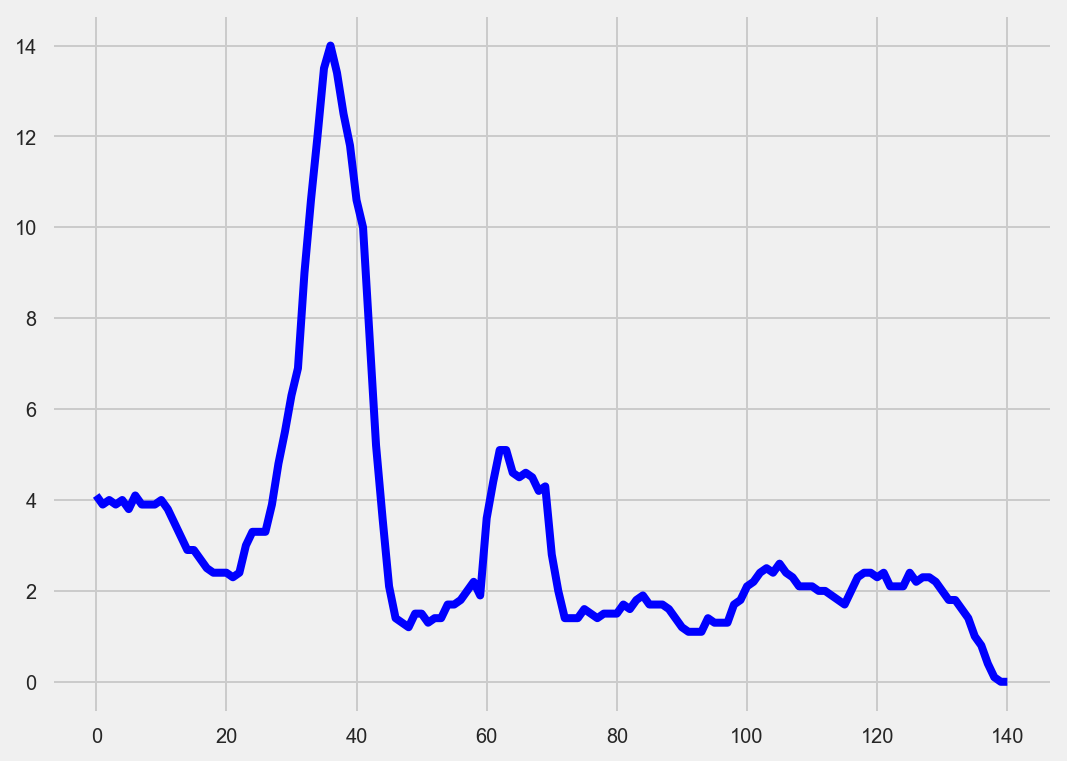

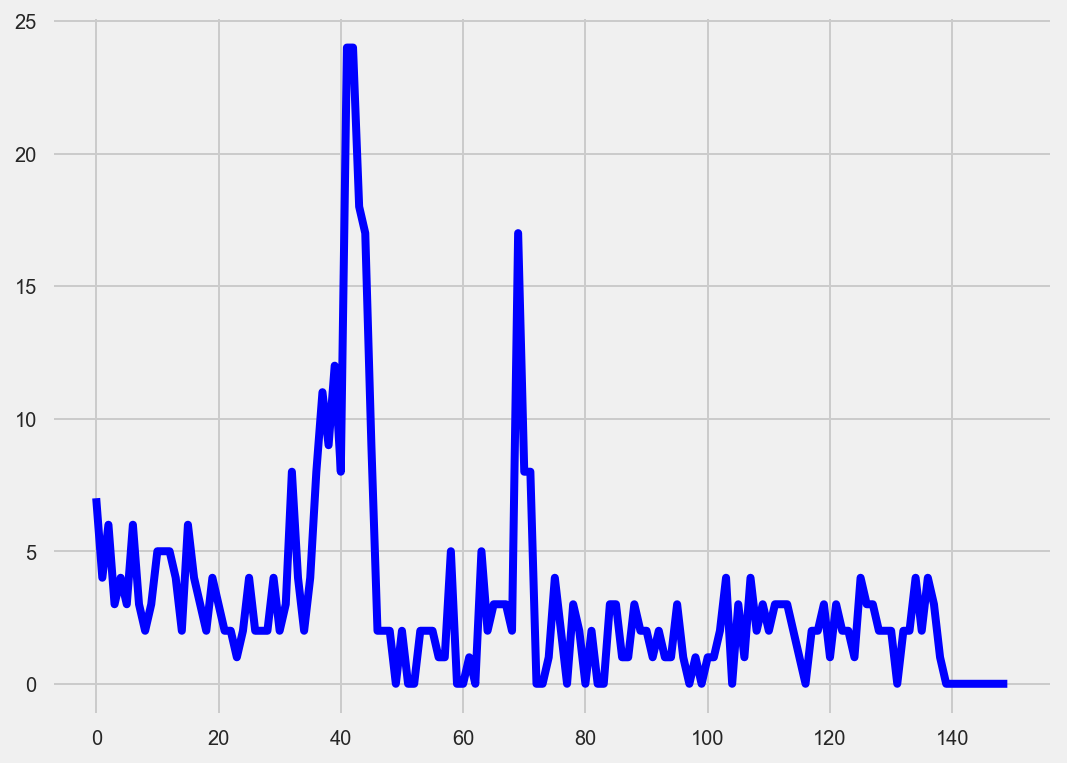

In [32]:
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")


peak_f = "Results/output/TSS1.exp.bed"
peaks_df = read_bed_file(peak_f)

curr = motifs_df.query("motif_id == 'tata.motif' ")
num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)
curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)

#first_seq = curr_out.columns.values[0]
first_seq = curr_out_pos.columns.values[0]

for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
    if val["strand"] == "+":
        curr_out_pos.at[val["sequence_name"],first_seq + val["start"] - 1] = True

N = 10
f = plt.figure()
plt.plot(np.convolve(np.array(curr_out_pos.sum()), np.ones((N,))/N, mode='valid'))

f = plt.figure()
plt.plot((np.array(curr_out_pos.sum())))


In [81]:
import plot_tss_results

([58, 52, 55, 59, 38, 55, 76, 122, 34, 40, 50, 46, 60, 50, 36],
 [-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 69])

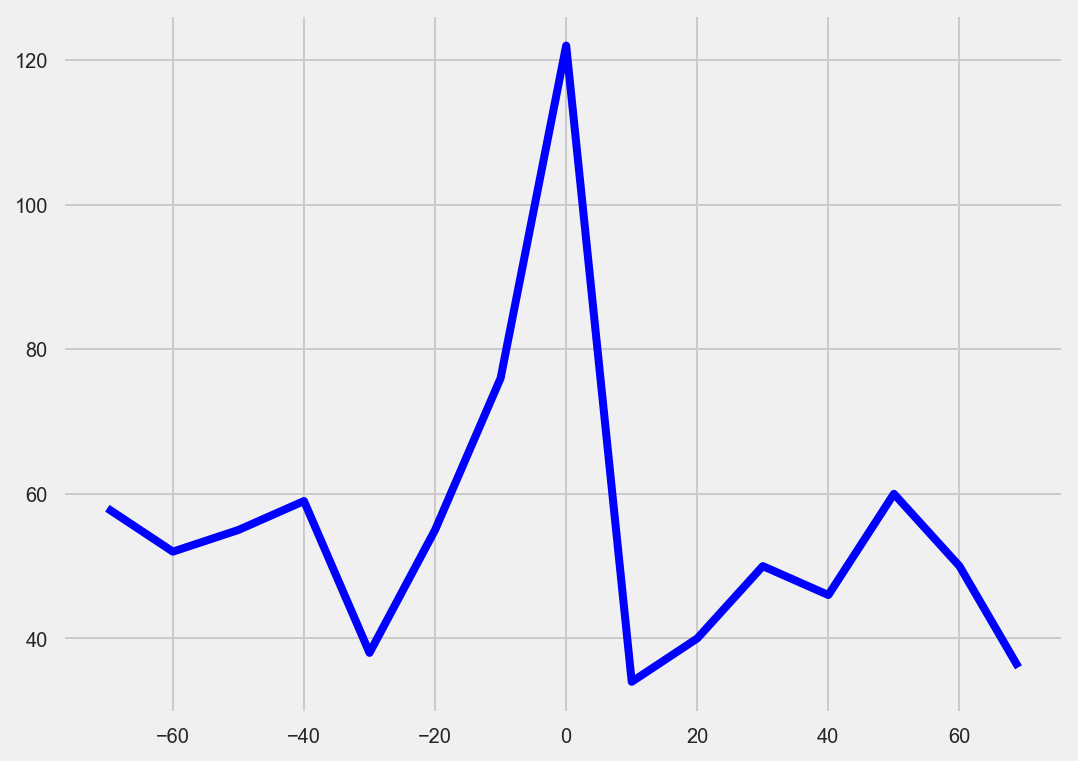

In [83]:
plot_tss_results.create_bins(curr_out_pos.sum(),w=10)

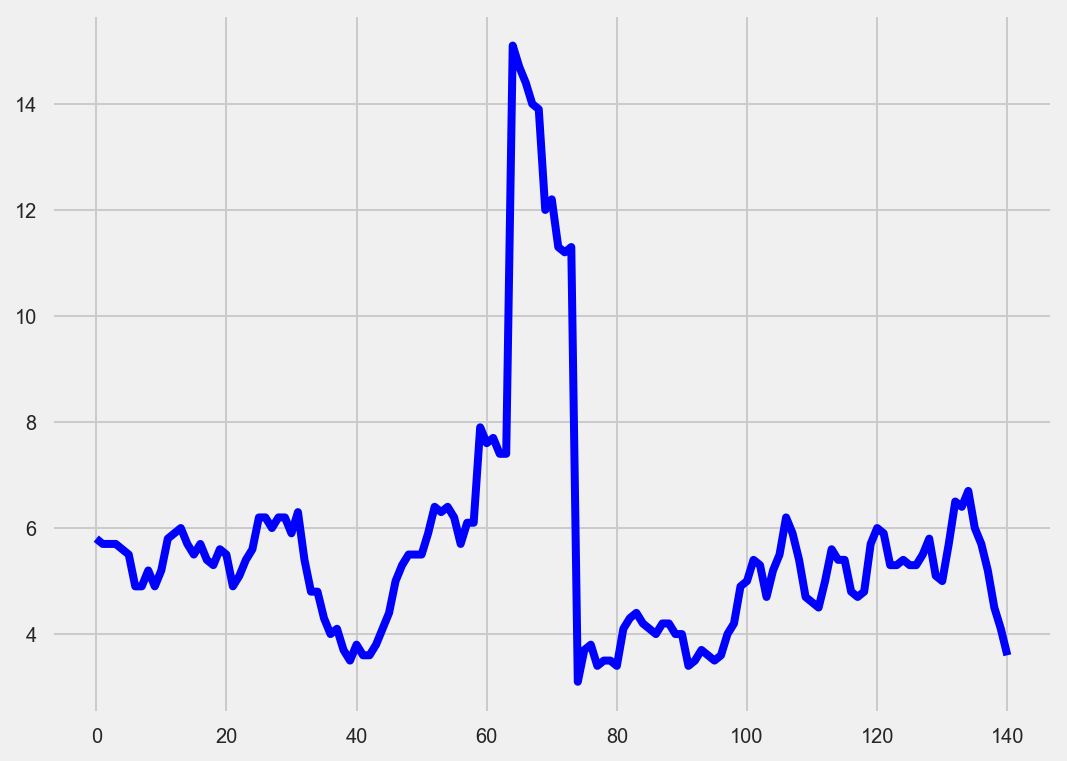

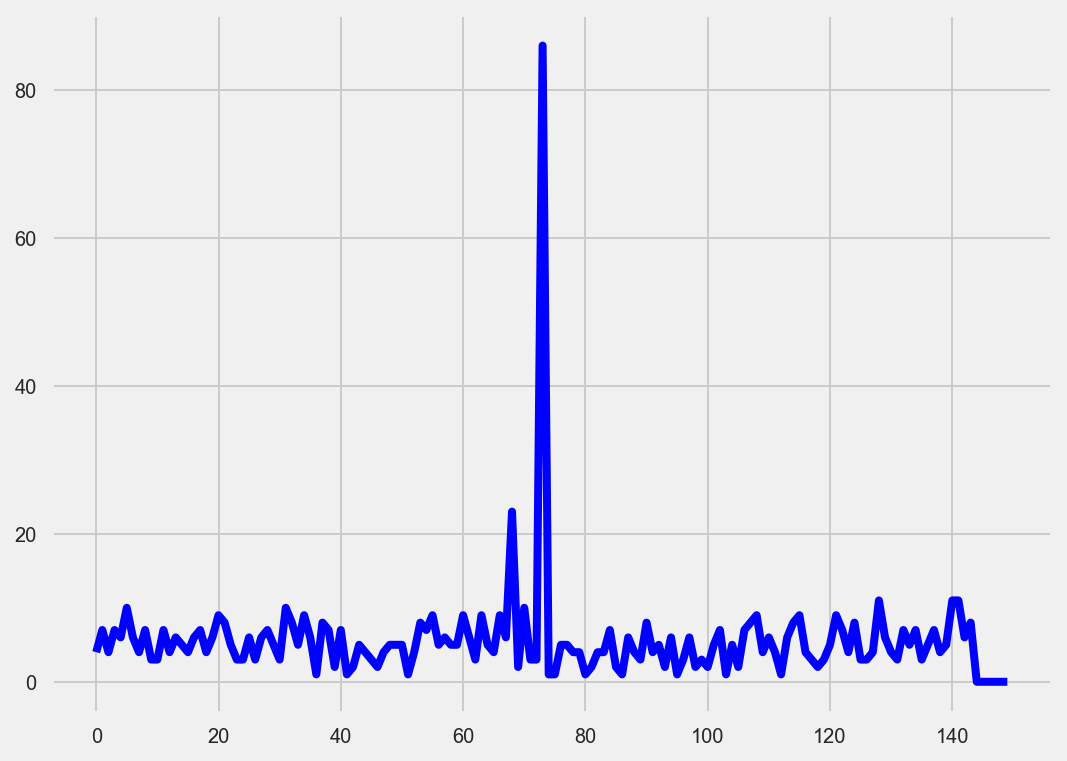

In [33]:
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")


peak_f = "Results/output/TSS1.exp.bed"
peaks_df = read_bed_file(peak_f)

curr = motifs_df.query("motif_id == 'inr.motif' ")
num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)
curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)

#first_seq = curr_out.columns.values[0]
first_seq = curr_out_pos.columns.values[0]

for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
    if val["strand"] == "+":
        curr_out_pos.at[val["sequence_name"],first_seq + val["start"] - 1] = True

N = 10
f = plt.figure()
plt.plot(np.convolve(np.array(curr_out_pos.sum()), np.ones((N,))/N, mode='valid'))

f = plt.figure()
plt.plot((np.array(curr_out_pos.sum())))
